# Sorting algorithms redux

In [1]:
from IPython.display import YouTubeVideo
import numpy as np

## 00. Introduction

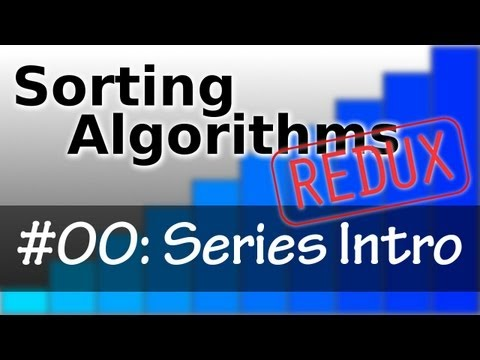

In [2]:
YouTubeVideo('MrUMzthTXOs')

## 01. Time complexity

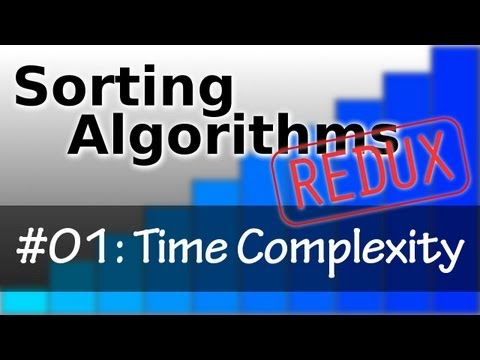

In [3]:
YouTubeVideo('aAnISzVGyzI')

## 02. Selection sort

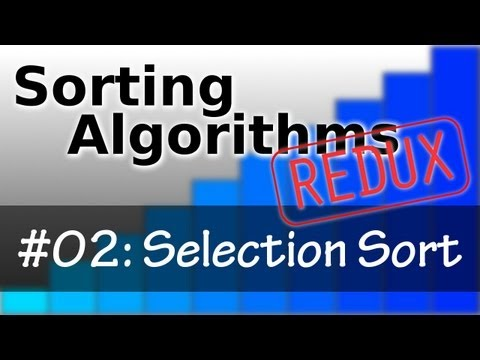

In [4]:
YouTubeVideo('MZ-ZeQnUL1Q')

In [5]:
def selection_sort(array):
    n = len(array)
    for i in range(n):
        first = array[i]
        small = first
        for j in range(i, n):
            if array[j] < small:
                small = array[j]
                k = j
        array[i], array[k] = small, first
    return array

### 02.a Checks 

In [6]:
selection_sort([]) == [] 

True

In [7]:
array = list(np.random.randint(100, size=120))
np.array_equal(selection_sort(array), np.sort(array))

True

## 03. Bubble sort

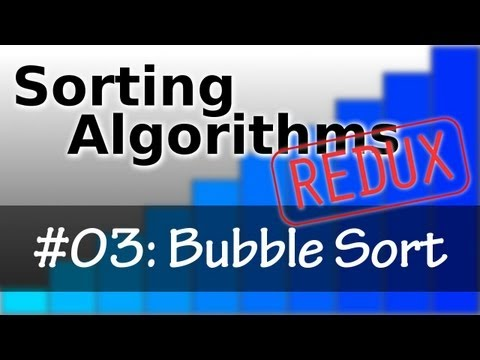

In [8]:
YouTubeVideo('jAoBsroEow4')

In [9]:
def bubble_sort(array): 
    n = len(array)
    for i in range(n):
        changed = False
        for j in range(n-i-1):
            if array[j] > array[j+1]:
                array[j], array[j+1] = array[j+1], array[j]
                changed = True
        if not changed:
            break
    return array

### 03.a Checks

In [10]:
bubble_sort([]) == []

True

In [11]:
array = [i for i in range(10)]
bubble_sort(array) == array

True

In [12]:
array = list(np.random.randint(100, size=120))
np.array_equal(bubble_sort(array), np.sort(array))

True

## 04. Cocktail sort

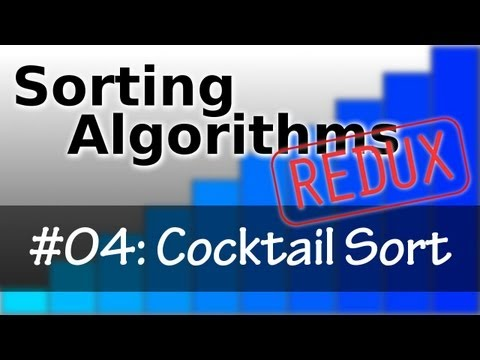

In [13]:
YouTubeVideo('Xmx_6YRBaq8')

In [14]:
# Sort while moving forward or backward
def partly_sort(array, i, forward):
    n = len(array)
    # Range of forward traverse
    if forward == True:
        interval = range(i, n-i-1)
    # Range of backward traverse
    elif forward == False:
        interval = reversed(range(i, n-i-2))
    # Partly sort
    changed = False
    for j in interval:
        if array[j] > array[j+1]:
            array[j], array[j+1] = array[j+1], array[j]
            changed = True
    return (array, changed)

# Cocktail sort
def cocktail_sort(array):
    n = len(array)
    for i in range(n):
        (array, changed) = partly_sort(array, i, True)
        if not changed:
            break
        (array, changed) = partly_sort(array, i, False)
        if not changed:
            break
    return array

### 04.a Checks

In [15]:
cocktail_sort([]) == []

True

In [16]:
array = [i for i in range(10)]
cocktail_sort(array) == array

True

In [17]:
array = list(np.random.randint(100, size=120))
np.array_equal(cocktail_sort(array), np.sort(array))

True

## 05. Insertion sort

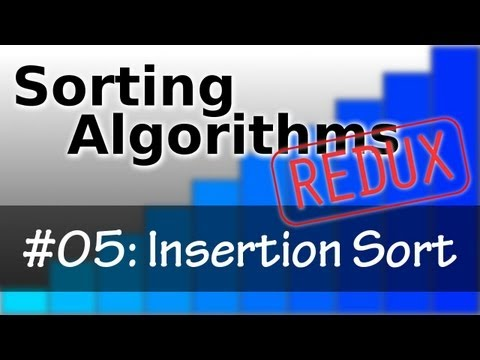

In [18]:
YouTubeVideo('I44aUk4vvq0')

In [19]:
def insertion_sort(array): 
    n = len(array)
    for i in range(n-1):
        j = i
        while (j+1 > 0) and (array[j] > array[j+1]): 
            small = array[j+1]
            array[j+1] = array[j]
            array[j] = small
            j -= 1
    return array

### 05.a Checks

In [20]:
insertion_sort([]) == []

True

In [21]:
array = list(np.random.randint(100, size=120))
np.array_equal(insertion_sort(array), np.sort(array))

True

## 06. Bucket sort

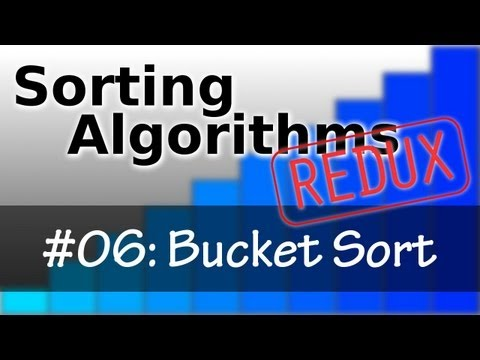

In [22]:
YouTubeVideo('ovAfqUafjAA')

In [23]:
def bucket_sort(array, mini, maxi, b, basic_sort = bubble_sort):
    n = len(array)
    # Safety checks
    if n == 0:
        return []
    elif (n < b):
        raise ValueError('Number of bins exceeds length of array.')
    # Bucketing
    step = float(maxi - mini)/b
    buckets = [[]]*b
    result = []
    for value in array:
        j = int((value - mini)/step)
        buckets[j] = buckets[j] + [value]
    # Sorting and recombining
    for key in range(b):
        result += basic_sort(buckets[key])
    return result

### 06.a Check

In [24]:
mini = 0.
maxi = 10.
array = np.random.uniform(mini, maxi, size=20)
np.array_equal(bucket_sort(array, mini, maxi, 10), np.sort(array))

True

## 07. Recursion

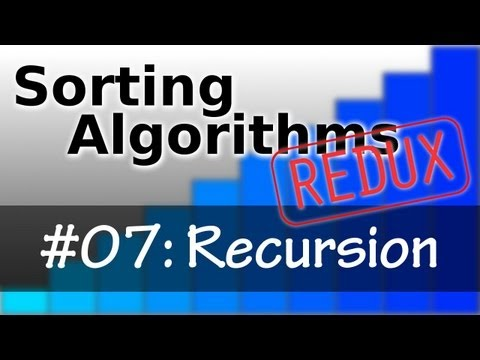

In [25]:
YouTubeVideo('sW4hA1iE3Dk')

In [26]:
# Get the nth Fibonacci number 
def get_fibonacci(n):
    if (n == 0) or (n == 1):
        return 1
    else:
        return get_fibonacci(n-1) + get_fibonacci(n-2)

Test get_fibonacci(n):

In [27]:
[get_fibonacci(i) for i in range(10)] 

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]

### 07.a Aside

The above recursion is a good way of calculating individual Fibonacci numbers, but not an efficient way of generating a list of Fibonacci numbers. In this latter case, one could proceed as follows:

In [28]:
def list_fibonacci(n):
    a = 1
    b = 1
    array = [a, b]
    for i in range(2, n):
        c = a + b
        array.append(c)
        a = b
        b = c
    return array[:n]

In [29]:
list_fibonacci(10)

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]

## 08. Quick sort

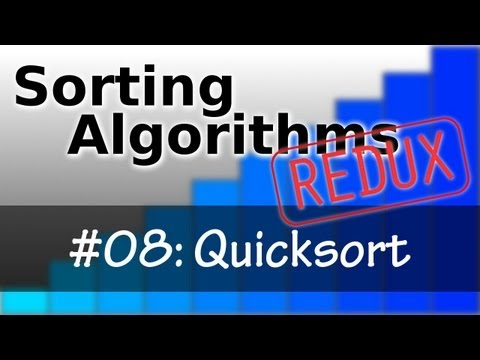

In [30]:
YouTubeVideo('AuD8KFQTLeM')

In [31]:
def partition(array):
    n = len(array)
    # Sorting
    l = 0
    r = n - 1
    pointer = (1, 0)
    while l < r:
        if array[l] > array[r]:
            small = array[r]
            array[r] = array[l]
            array[l] = small 
            pointer = pointer[::-1]
        l += pointer[0]
        r -= pointer[1]
    return (array, l)

def quick_sort(array):
    n = len(array)
    if n > 1:
        (array, p) = partition(array)
        array[:p] = quick_sort(array[:p])
        array[p+1:] = quick_sort(array[p+1:])
    return array

### 08.a Checks

In [32]:
quick_sort([]) == []

True

In [33]:
array = list(np.random.randint(100, size=120))
np.array_equal(quick_sort(array), np.sort(array))

True

## 09. Quick sort in real life

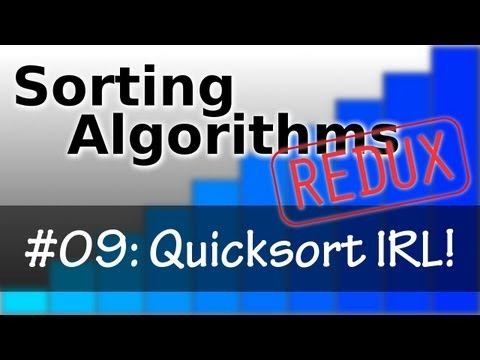

In [34]:
YouTubeVideo('WnYyHLMw0rU')

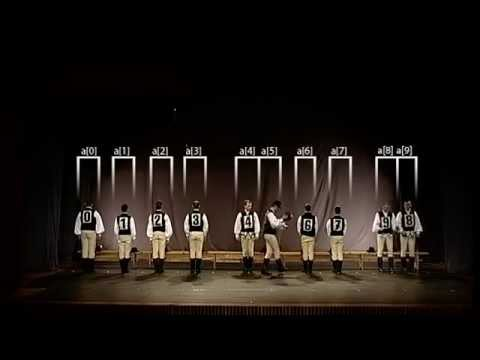

In [35]:
YouTubeVideo('3San3uKKHgg')

## 10. Merging

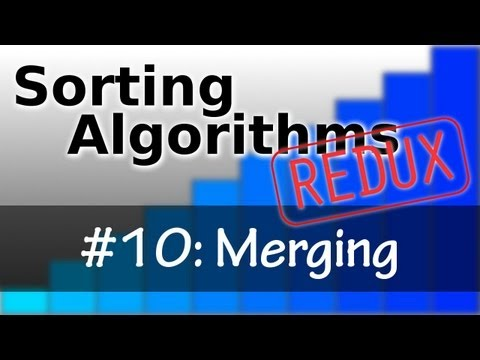

In [36]:
YouTubeVideo('4DENqHfvb-s')

In [37]:
def get_combo(one, two): 
    m = len(one)
    n = len(two)
    i = 0
    j = 0
    combo = [0]*(m+n)
    while (i+j) < (m+n):
        # Termination conditions
        if not two[j:]:
            combo[i+j:] = one[i:]
            break
        elif not one[i:]:
            combo[i+j:] = two[j:]
            break
        # Build combo up
        if one[i] < two[j]:
            combo[i+j] = one[i]
            i += 1
        else: 
            combo[i+j] = two[j]
            j += 1
    return combo

### 10.a Checks

In [38]:
get_combo([],[]) == []

True

In [39]:
get_combo([0,1],[]) == [0,1]

True

In [40]:
get_combo([],[0,1]) == [0,1]

True

In [41]:
get_combo([1, 2, 3, 4, 5, 6, 7], [1, 2, 4, 5, 6])

[1, 1, 2, 2, 3, 4, 4, 5, 5, 6, 6, 7]

## 11. Merge sort

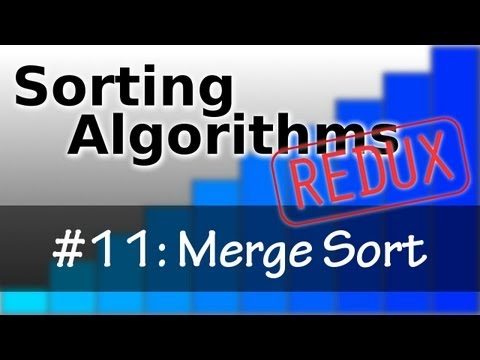

In [42]:
YouTubeVideo('aYPawGo-edE')

In [43]:
def merge_sort(array):
    n = len(array)
    if n > 1:
        i = int(n/2)
        left = merge_sort(array[:i])
        right = merge_sort(array[i:])
        return get_combo(left, right)
    else: 
        return array

### 11.a Checks

In [44]:
merge_sort([]) == []

True

In [45]:
array = list(np.random.randint(100, size=120))
np.array_equal(merge_sort(array), np.sort(array))

True

## 12. Wrap-up

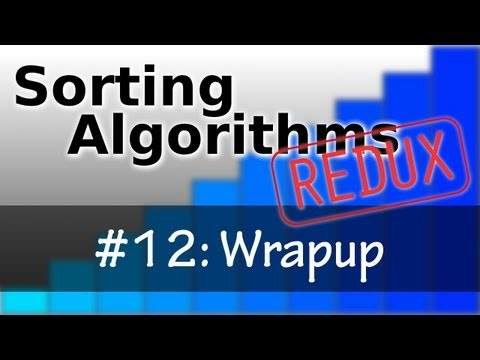

In [46]:
YouTubeVideo('-RHzTr18rV4')

## 13. Credits

Video Lectures: 0612 (https://about.me/lcc0612).
Folk-Dance Video: Sapientia University, Târgu Mureș, Romania.
Coding: Alberto Favaro (https://www.linkedin.com/in/alberto-favaro-404055121)